used to create thermal_expectations_BGS.py

In [1]:
import sys
import os
sys.path.append("../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, scatter
#Custom made imports
import single_particle_sector as sps

from time import time

In [2]:
###Functions
def E_p(p,L,J,h):
    #Currently only for PBC or ABC
    bc = ["ABC","PBC"]
    bc = bc[p]
    
    #Hamiltonian and spectrum
    H = sps.H_bdg(h,L,J,bc)
    E, U = la.eigh(H)
    E = E[L:]
    #Ground state correlation matrix
    G_gs = sps.G_tfim(U[:,:L])
    F = G_gs[:L,L:]
    G = G_gs[:L,:L]
    M = np.eye(L)-2*(G+F)
    #Determine parity
    n = la.det(M)*(-1)**L * (-1)**p

    return  E,U,n

def Z_p(n,E,beta):
    #Definition given in first source
    Z =  (np.prod(1+np.exp(-beta*2*E))
        +n*np.prod(1-np.exp(-2*beta*E)))
    return Z/2

def ca(n,E,beta,mu):
        #Define Positive Energies
        #Prefactor
        pf = np.exp(-2*beta*E[mu])
        #Remove site energy from Partition
        E = np.delete(E,mu)
        #Calculate
        ca_p = (np.prod(1+np.exp(-2*beta*E))-
               n*np.prod(1-np.exp(-2*beta*E)))
        #Return average of two terms
        return pf*ca_p/2
def ac(n,E,beta,mu):
        #Remove site energy from Partition

        E = np.delete(E,mu)

        ac_p = (np.prod(1+np.exp(-2*beta*E))+
               n*np.prod(1-np.exp(-2*beta*E)))
        return ac_p/2

def G_th(parities,beta,args):
    #Unpack Arguments
    L,J,h = args
    Z = 0
    G = 0
    for p in parities:
        #Spectrum
        E,U,n = E_p(p,L,J,h)
        #Partition Function
        Z += Z_p(n,E,beta)
        #Correlation matrix of Phi Phi_Dagger
        N = np.diag([ac(n,E,beta,mu) for mu in range(L)]+[ca(n,E,beta,mu) for mu in range(L)])/Z_p(n,E,beta)
        G+= U@N@U.T.conj()*Z_p(n,E,beta)
    return G/Z

def M(Gi):
    
    L = np.shape(Gi)[0]//2
    G = Gi[:L,:L]
    F = Gi[:L,L:]
    return np.eye(L)-2*(G+F)


(0.0, 1.0)

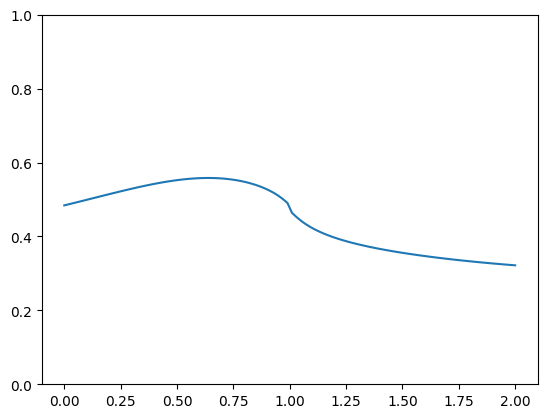

In [3]:
L = 50
J = -1
h = 1
beta = 1.111
##
p = [0,1]
h_i = np.linspace(0,2,100)

args = [(L,J,h) for h in h_i]
G= [G_th(p,beta,argi) for argi in args]

plot(h_i,[sps.P_n(2,Gi,L) for Gi in G])
plt.ylim(0,1)

In [ ]:
beta = 0.5
plt.plot(Z_p(1,E,beta)

np.float64(0.6212693243402093)

In [105]:
ca(-1,E,beta,0)/Z_p(1,E,beta)

np.float64(0.37797844785739765)

512